In [42]:
import pandas as pd
import random
import time
from datetime import datetime

df = pd.read_csv('film_collection.csv')
df.head()

,Position,Name,Year,URL,Description
0,1,12 Angry Men,1957,https://boxd.it/2auI,#591
1,2,12 Years a Slave,2013,https://boxd.it/2D2e,NaN
2,3,1917,2019,https://boxd.it/jj4y,NaN
3,4,2001: A Space Odyssey,1968,https://boxd.it/2bf0,NaN
4,5,The 39 Steps,1935,https://boxd.it/2aKc,#56


In [43]:
drop_columns = ['Position', 'URL', 'Description']
film_lib = df.drop(labels = drop_columns, axis = 1)
film_lib.head()

,Name,Year
0,12 Angry Men,1957
1,12 Years a Slave,2013
2,1917,2019
3,2001: A Space Odyssey,1968
4,The 39 Steps,1935


In [44]:
film_lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    376 non-null    object
 1   Year    376 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


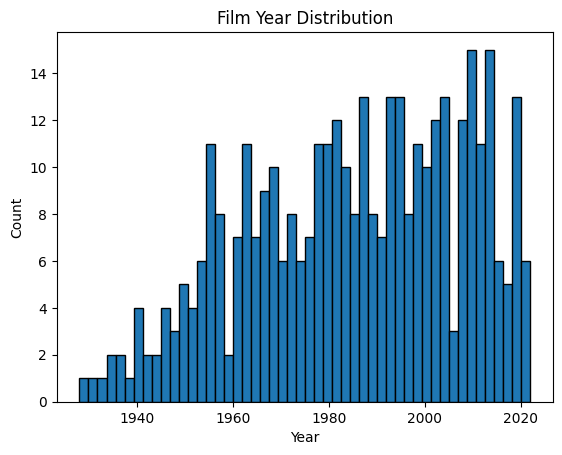

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(film_lib['Year'], bins = 50, edgecolor = 'black')
plt.title('Film Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [46]:
df2 = pd.read_csv('diary.csv')
df2.head()

,Date,Name,Year,Letterboxd URI,Rating,Rewatch,Tags,Watched Date
0,2018-06-20,Incredibles 2,2018,https://boxd.it/tfLaD,2.5,NaN,NaN,2018-06-16
1,2018-06-21,First Reformed,2017,https://boxd.it/thF1f,4.0,Yes,NaN,2018-06-19
2,2018-06-22,Carol,2015,https://boxd.it/tkNv9,4.5,NaN,NaN,2018-06-21
3,2018-06-23,Won't You Be My Neighbor?,2018,https://boxd.it/tmk1X,5.0,NaN,NaN,2018-06-22
4,2018-06-26,The Intern,2015,https://boxd.it/ttCn7,3.0,Yes,NaN,2018-06-25


In [47]:
drop_columns = ['Date', 'Year', 'Letterboxd URI', 'Rating', 'Tags']
diary = df2.drop(labels = drop_columns, axis = 1)
diary.head()

,Name,Rewatch,Watched Date
0,Incredibles 2,NaN,2018-06-16
1,First Reformed,Yes,2018-06-19
2,Carol,NaN,2018-06-21
3,Won't You Be My Neighbor?,NaN,2018-06-22
4,The Intern,Yes,2018-06-25


In [48]:
column_mapper = {'Name': 'Title'}
diary = diary.rename(mapper = column_mapper, axis = 1)
diary.head()

,Title,Rewatch,Watched Date
0,Incredibles 2,NaN,2018-06-16
1,First Reformed,Yes,2018-06-19
2,Carol,NaN,2018-06-21
3,Won't You Be My Neighbor?,NaN,2018-06-22
4,The Intern,Yes,2018-06-25


In [71]:
diary['Rewatch'].fillna('No', inplace = True)
diary['Rewatch'].value_counts()

No     702
Yes    464
Name: Rewatch, dtype: int64

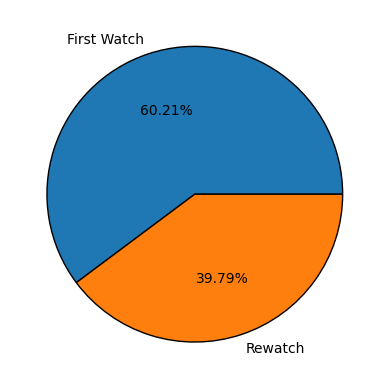

In [77]:
import numpy as np

y = np.array([(702/1166), (464/1166)])
pie_labels = ['First Watch', 'Rewatch']

plt.clf()
plt.pie(y, labels=pie_labels, wedgeprops={'edgecolor': 'black'}, autopct='%1.2f%%')
plt.show()

In [49]:
# Define function to return randomized film recommendation from the inputted year

def rec_by_year(film_library):
    
    rec_id = 0
    recommendation = ''
    
    print()
    movie_year = int(input('Enter a year: '))
    year_titles_df = film_library[film_library['Year'] == movie_year]
    
    print()
    print(year_titles_df)
    print()
    
    # Rest of the function prints out randomized selection from dataset gathered above
    time.sleep(3.0)
    
    year_titles_series = film_library[film_library['Year'] == movie_year]['Name']
    year_titles = list(year_titles_series)
    
    if len(year_titles) < 1:
        print('I own 0 films from this year.')
        return None
    else:
        rec_id = random.randint(0, len(year_titles)-1)
        recommendation = year_titles[rec_id]
        
    print('You should watch \'{rec}\' tonight!'.format(rec = recommendation))
    
    return recommendation

rec_by_year(film_lib)



                  Name  Year
20       Andrei Rublev  1966
77       The Creatures  1966
82             Daisies  1966
256            Persona  1966
324  The Sword of Doom  1966

You should watch 'The Sword of Doom' tonight!


'The Sword of Doom'

In [50]:
# Define function that returns most recent date the entered film was watched by the film collection owner

def last_seen(dates_df):
    
    print()
    film_title = input('Enter a film title: ')
    df_title = ''
    print()
    date_lst = []
    
    for i in range(len(dates_df)):
        if dates_df.iloc[i]['Title'].lower() == film_title.lower():
            date_lst.append(dates_df.iloc[i]['Watched Date'])
            df_title = dates_df.iloc[i]['Title']
    if not date_lst:
            print('Sorry, you haven\'t watched this film since you began logging on Letterboxd!')
            return None
    else:
        date_last_seen = date_lst[-1]
            
    ls_split = date_last_seen.split('-')
    last_seen = ls_split[1] + '-' + ls_split[2] + '-' + ls_split[0]
        
    raw_date = datetime.strptime(last_seen, '%m-%d-%Y')
    date_str = datetime.strftime(raw_date, '%A, %B %d, %Y')
        
    ago_date = datetime.now() - raw_date
    ago_str = str(ago_date).split(',')
    days_ago = ago_str[0]
        
    print('You last saw \'{film}\' on {date}. That was {days} ago.'.format(film = df_title, date = date_str, days = days_ago))
        
    return date_last_seen, days_ago
    
last_seen(diary)



You last saw 'Psycho' on Wednesday, May 13, 2020. That was 1048 days ago.


('2020-05-13', '1048 days')

In [51]:
# Welcome to the film recommendation tool:

print('Hello!')
print('What feature would you like to use?')
print()
print('1. Movie recommendation by year\n2. Last time you saw a particular film')
print()

select_function = input(': ')

if select_function == '1':
    rec_by_year(film_lib)
elif select_function == '2':
    last_seen(diary)
else:
    print('Sorry, that was not an option!')

Hello!
What feature would you like to use?

1. Movie recommendation by year
2. Last time you saw a particular film



                  Name  Year
160  In a Lonely Place  1950
342             To Joy  1950

You should watch 'To Joy' tonight!
